# MSC Applied Econommics 
## Environmental Kurtznets Curve 

## Environment Set Up:

In [1]:
# Install dependencies
# Please ensure your python environment includes all the dependencies below and any Jupiter notebook requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts 
from statsmodels.stats.diagnostic import het_white
from sklearn import linear_model
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
import csv



## Loading, prepparing and cleaning data:

In [2]:
# Load production based data
territorial_emissions = pd.read_excel('../Data/Emmissions Data.xlsx', sheet_name=0)
territorial_emissions = territorial_emissions.rename(columns={'MtC/yr': 'Year'})
territorial_emissions = territorial_emissions.set_index('Year')
territorial_emissions.head()



,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
1959,0.104959,0.394,1.543946,NaN,0.168830,NaN,0.008,13.359389,0.858819,0.196335,...,356.227009,11.035273,1013.054177,19.314339,839.235511,25.898496,53.765340,58.234000,3.552714e-13,2417.132824
1960,0.112960,0.552,1.678832,NaN,0.149823,NaN,0.010,13.309088,0.894362,0.168821,...,395.913772,9.886475,1081.501751,24.638551,860.628784,27.509237,54.356586,64.988958,-6.821210e-13,2562.175330
1961,0.133951,0.622,1.652817,NaN,0.123828,NaN,0.013,13.953796,0.923353,0.176188,...,355.177453,10.462966,1121.014044,25.787066,858.748376,28.241123,55.073799,71.847433,5.684342e-14,2570.587685
1962,0.187935,0.672,1.545036,NaN,0.321814,NaN,0.028,14.639772,0.970543,0.193489,...,337.271308,12.257956,1182.944420,29.829499,891.084416,29.206067,58.861940,74.493219,1.705303e-12,2661.370899
1963,0.192886,0.568,1.479027,NaN,0.313789,NaN,0.023,13.655202,1.042160,0.185341,...,355.406750,10.644867,1257.417562,33.731761,929.054815,31.176766,59.888851,77.984751,6.963319e-13,2803.463447


In [3]:
# Load consumption based data
consumption_emissions = pd.read_excel('../Data/Emmissions Data.xlsx', sheet_name=1)
consumption_emissions = consumption_emissions.rename(columns={'MtC/yr': 'Year'})
consumption_emissions = consumption_emissions.set_index('Year')
print(consumption_emissions.head(20).index.tolist())
consumption_emissions.head()

[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978]


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.234000,NaN,2417.132824
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.988958,NaN,2562.175330
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.847433,NaN,2570.587685
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.493219,NaN,2661.370899
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.984751,NaN,2803.463447


In [4]:
print(territorial_emissions.columns)

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Asia', 'Central America', 'Europe', 'Middle East', 'North America',
       'Oceania', 'South America', 'Bunkers', 'Statistical Difference',
       'World'],
      dtype='object', length=235)


In [5]:
print(territorial_emissions['United Kingdom'])
print(territorial_emissions.head(20).index.tolist())


Year
1959    149.182896
1960    159.394110
1961    160.648144
1962    161.826282
1963    164.679493
           ...    
2016    108.989463
2017    105.776523
2018    104.227527
2019    100.712252
2020     89.997307
Name: United Kingdom, Length: 62, dtype: float64
[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978]


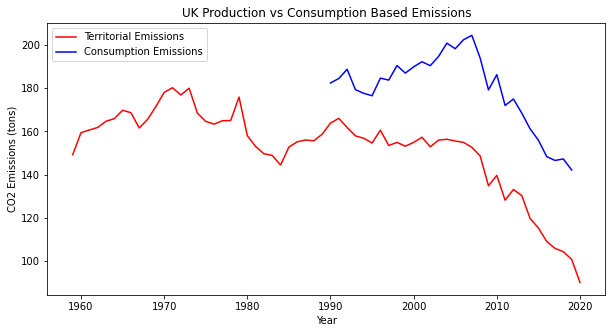

In [6]:
# Visualize production based data and consumption based data together
# Plot production based data
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions.index.values, territorial_emissions['United Kingdom'], color='red', label='Territorial Emissions')
plt.plot(consumption_emissions.index.values, consumption_emissions['United Kingdom'], color='blue', label='Consumption Emissions')
plt.legend(loc='upper left')
plt.title('UK Production vs Consumption Based Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.show()


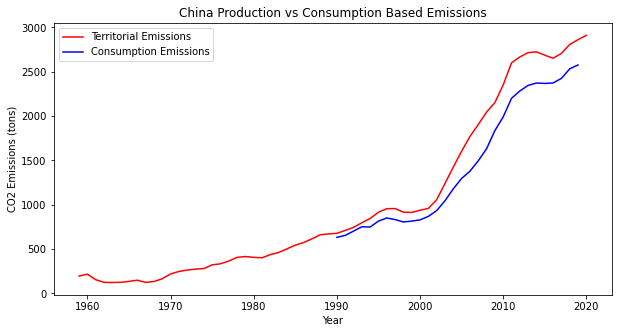

In [7]:
# Visualize production based data and consumption based data together
# Plot production based data
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions.index.values, territorial_emissions['China'], color='red', label='Territorial Emissions')
plt.plot(consumption_emissions.index.values, consumption_emissions['China'], color='blue', label='Consumption Emissions')
plt.legend(loc='upper left')
plt.title('China Production vs Consumption Based Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.show()

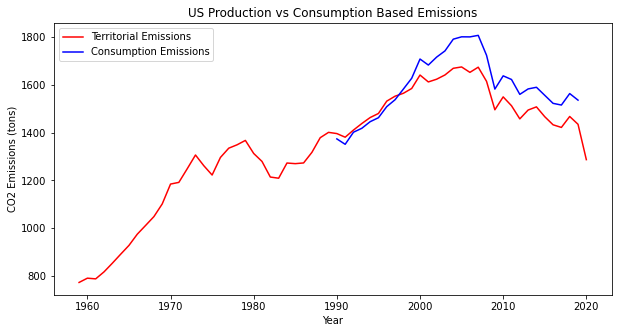

In [8]:
# Visualize production based data and consumption based data together
# Plot production based data
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions.index.values, territorial_emissions['USA'], color='red', label='Territorial Emissions')
plt.plot(consumption_emissions.index.values, consumption_emissions['USA'], color='blue', label='Consumption Emissions')
plt.legend(loc='upper left')
plt.title('US Production vs Consumption Based Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.show()

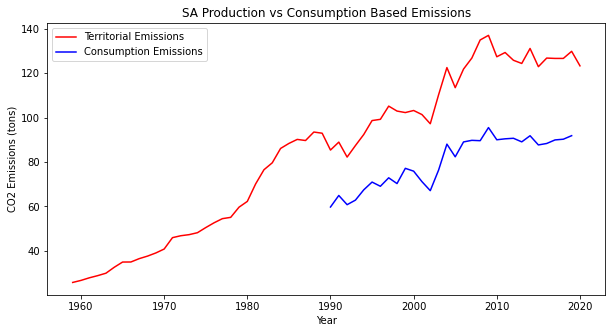

In [9]:
# Visualize production based data and consumption based data together
# Plot production based data
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions.index.values, territorial_emissions['South Africa'], color='red', label='Territorial Emissions')
plt.plot(consumption_emissions.index.values, consumption_emissions['South Africa'], color='blue', label='Consumption Emissions')
plt.legend(loc='upper left')
plt.title('SA Production vs Consumption Based Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.show()

In [10]:
# Load emissions trade based data
trade_of_emissions = pd.read_excel('../Data/Emmissions Data.xlsx', sheet_name=2)
trade_of_emissions = trade_of_emissions.rename(columns={'MtC/yr': 'Year'})
trade_of_emissions = trade_of_emissions.set_index('Year')
print(trade_of_emissions.head(20).index.tolist())
trade_of_emissions = trade_of_emissions.add_suffix(' Emissions Trade')
trade_of_emissions.head()

[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978]


,Afghanistan Emissions Trade,Albania Emissions Trade,Algeria Emissions Trade,Andorra Emissions Trade,Angola Emissions Trade,Anguilla Emissions Trade,Antigua and Barbuda Emissions Trade,Argentina Emissions Trade,Armenia Emissions Trade,Aruba Emissions Trade,...,Asia Emissions Trade,Central America Emissions Trade,Europe Emissions Trade,Middle East Emissions Trade,North America Emissions Trade,Oceania Emissions Trade,South America Emissions Trade,Bunkers Emissions Trade,Statistical Difference Emissions Trade,World Emissions Trade
Year,,,,,,,,,,,,,,,,,,,,,
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


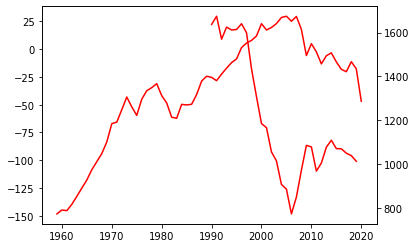

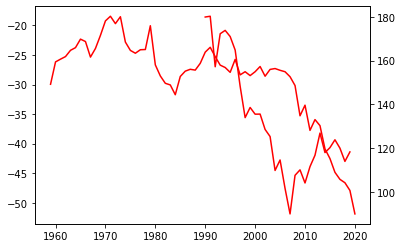

In [11]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(trade_of_emissions.index.values, trade_of_emissions['USA Emissions Trade'], color='red', label='Trade of Emissions')
ax_right.plot(territorial_emissions.index.values, territorial_emissions['USA'], color='red', label='Territorial Emissions')
plt.show()

# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(trade_of_emissions.index.values, trade_of_emissions['United Kingdom Emissions Trade'], color='red', label='Trade of Emissions')
ax_right.plot(territorial_emissions.index.values, territorial_emissions['United Kingdom'], color='red', label='Territorial Emissions')
plt.show()


In [12]:
# Load GDP Data - Economic Growth
gdp_per_capita = pd.read_excel('../Data/GDP_per_capita_cleaned.xls')
gdp_per_capita = gdp_per_capita.transpose()
gdp_per_capita.columns = gdp_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = gdp_per_capita.columns
gdp_per_capita[cols] = gdp_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
gdp_per_capita = gdp_per_capita.drop(gdp_per_capita.index[0])
gdp_per_capita.index = pd.to_numeric(gdp_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
gdp_per_capita = gdp_per_capita.rename(index={0: 'Year'})
gdp_per_capita = gdp_per_capita.add_suffix(' GDP')
print(gdp_per_capita.head(20).index.tolist())
print(gdp_per_capita.columns)
gdp_per_capita.head()
print(gdp_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba GDP', 'Africa Eastern and Southern GDP', 'Afghanistan GDP',
       'Africa Western and Central GDP', 'Angola GDP', 'Albania GDP',
       'Andorra GDP', 'Arab World GDP', 'United Arab Emirates GDP',
       'Argentina GDP',
       ...
       'Virgin Islands (U.S.) GDP', 'Vietnam GDP', 'Vanuatu GDP', 'World GDP',
       'Samoa GDP', 'Kosovo GDP', 'Yemen, Rep. GDP', 'South Africa GDP',
       'Zambia GDP', 'Zimbabwe GDP'],
      dtype='object', name='Country', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


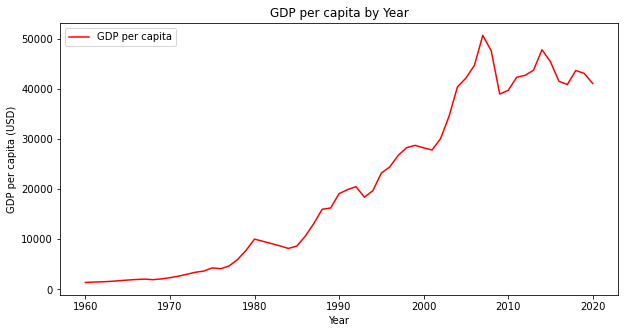

In [13]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(gdp_per_capita.index.values, gdp_per_capita['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('GDP per capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP per capita (USD)')
plt.show()


In [14]:
# Load Income Data - Economic Growth
income_per_capita = pd.read_excel('../Data/per_capita_income.xls')
income_per_capita = income_per_capita.transpose()
income_per_capita.columns = income_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = income_per_capita.columns
income_per_capita[cols] = income_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
income_per_capita = income_per_capita.drop(income_per_capita.index[0])
income_per_capita.index = pd.to_numeric(income_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
income_per_capita = income_per_capita.rename(index={0: 'Year'})
income_per_capita = income_per_capita.add_suffix(' Income')
print(income_per_capita.head(20).index.tolist())
print(income_per_capita.columns)
income_per_capita.head()
print(income_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Income', 'Africa Eastern and Southern Income',
       'Afghanistan Income', 'Africa Western and Central Income',
       'Angola Income', 'Albania Income', 'Andorra Income',
       'Arab World Income', 'United Arab Emirates Income', 'Argentina Income',
       ...
       'Virgin Islands (U.S.) Income', 'Vietnam Income', 'Vanuatu Income',
       'World Income', 'Samoa Income', 'Kosovo Income', 'Yemen, Rep. Income',
       'South Africa Income', 'Zambia Income', 'Zimbabwe Income'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [15]:
# Load Energy Usage Data
energy_usage_per_capita = pd.read_excel('../Data/energy_usage_per_capita.xls')
energy_usage_per_capita = energy_usage_per_capita.transpose()
energy_usage_per_capita.columns = energy_usage_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = energy_usage_per_capita.columns
energy_usage_per_capita[cols] = energy_usage_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
energy_usage_per_capita = energy_usage_per_capita.drop(energy_usage_per_capita.index[0])
energy_usage_per_capita.index = pd.to_numeric(energy_usage_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
energy_usage_per_capita = energy_usage_per_capita.rename(index={0: 'Year'})
energy_usage_per_capita = energy_usage_per_capita.add_suffix(' Energy Usage')
print(energy_usage_per_capita.head(20).index.tolist())
print(energy_usage_per_capita.columns)
energy_usage_per_capita.head()
print(energy_usage_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Energy Usage', 'Africa Eastern and Southern Energy Usage',
       'Afghanistan Energy Usage', 'Africa Western and Central Energy Usage',
       'Angola Energy Usage', 'Albania Energy Usage', 'Andorra Energy Usage',
       'Arab World Energy Usage', 'United Arab Emirates Energy Usage',
       'Argentina Energy Usage',
       ...
       'Virgin Islands (U.S.) Energy Usage', 'Vietnam Energy Usage',
       'Vanuatu Energy Usage', 'World Energy Usage', 'Samoa Energy Usage',
       'Kosovo Energy Usage', 'Yemen, Rep. Energy Usage',
       'South Africa Energy Usage', 'Zambia Energy Usage',
       'Zimbabwe Energy Usage'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [16]:
# Load Trade Data
trade_per_capita = pd.read_excel('../Data/trade_percentage_of_gdp.xls')
trade_per_capita = trade_per_capita.transpose()
trade_per_capita.columns = trade_per_capita.iloc[0]
# Convert to numeric: (check works for index)
cols = trade_per_capita.columns
trade_per_capita[cols] = trade_per_capita[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
trade_per_capita = trade_per_capita.drop(trade_per_capita.index[0])
trade_per_capita.index = pd.to_numeric(trade_per_capita.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
trade_per_capita = trade_per_capita.rename(index={0: 'Year'})
trade_per_capita = trade_per_capita.add_suffix(' Trade')
print(trade_per_capita.head(20).index.tolist())
print(trade_per_capita.columns)
trade_per_capita.head()
print(trade_per_capita.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Trade', 'Africa Eastern and Southern Trade', 'Afghanistan Trade',
       'Africa Western and Central Trade', 'Angola Trade', 'Albania Trade',
       'Andorra Trade', 'Arab World Trade', 'United Arab Emirates Trade',
       'Argentina Trade',
       ...
       'Virgin Islands (U.S.) Trade', 'Vietnam Trade', 'Vanuatu Trade',
       'World Trade', 'Samoa Trade', 'Kosovo Trade', 'Yemen, Rep. Trade',
       'South Africa Trade', 'Zambia Trade', 'Zimbabwe Trade'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [17]:
# Load Urbanization Data
urbanization = pd.read_excel('../Data/urbanization_growth.xls')
urbanization = urbanization.transpose()
urbanization.columns = urbanization.iloc[0]
# Convert to numeric: (check works for index)
cols = urbanization.columns
urbanization[cols] = urbanization[cols].apply(pd.to_numeric, errors='coerce')
# Convert index to float64:
urbanization = urbanization.drop(urbanization.index[0])
urbanization.index = pd.to_numeric(urbanization.index)
# Set first column as index and name it 'Year'

# gdp_per_capita = gdp_per_capita.set_index(gdp_per_capita.columns[0])
urbanization = urbanization.rename(index={0: 'Year'})
urbanization = urbanization.add_suffix(' Urbanization')
print(urbanization.head(20).index.tolist())
print(urbanization.columns)
urbanization.head()
print(urbanization.head(20).index.tolist())

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]
Index(['Aruba Urbanization', 'Africa Eastern and Southern Urbanization',
       'Afghanistan Urbanization', 'Africa Western and Central Urbanization',
       'Angola Urbanization', 'Albania Urbanization', 'Andorra Urbanization',
       'Arab World Urbanization', 'United Arab Emirates Urbanization',
       'Argentina Urbanization',
       ...
       'Virgin Islands (U.S.) Urbanization', 'Vietnam Urbanization',
       'Vanuatu Urbanization', 'World Urbanization', 'Samoa Urbanization',
       'Kosovo Urbanization', 'Yemen, Rep. Urbanization',
       'South Africa Urbanization', 'Zambia Urbanization',
       'Zimbabwe Urbanization'],
      dtype='object', name='Country Name', length=266)
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]


In [18]:
# converted_gdp = pd.to_numeric(gdp_per_capita['United Kingdom GDP'])
territorial_emissions_final = territorial_emissions.join(gdp_per_capita).join(income_per_capita).join(energy_usage_per_capita).join(trade_per_capita).join(urbanization)
print(territorial_emissions_final.head())
print(territorial_emissions_final['United Kingdom'])
print(territorial_emissions_final['United Kingdom GDP'])

      Afghanistan  Albania   Algeria  Andorra    Angola  Anguilla  \
Year                                                                
1959     0.104959    0.394  1.543946      NaN  0.168830       NaN   
1960     0.112960    0.552  1.678832      NaN  0.149823       NaN   
1961     0.133951    0.622  1.652817      NaN  0.123828       NaN   
1962     0.187935    0.672  1.545036      NaN  0.321814       NaN   
1963     0.192886    0.568  1.479027      NaN  0.313789       NaN   

      Antigua and Barbuda  Argentina   Armenia     Aruba  ...  \
Year                                                      ...   
1959                0.008  13.359389  0.858819  0.196335  ...   
1960                0.010  13.309088  0.894362  0.168821  ...   
1961                0.013  13.953796  0.923353  0.176188  ...   
1962                0.028  14.639772  0.970543  0.193489  ...   
1963                0.023  13.655202  1.042160  0.185341  ...   

      Virgin Islands (U.S.) Urbanization  Vietnam Urbanizati

In [19]:
consumption_emissions_final = consumption_emissions.join(gdp_per_capita).join(income_per_capita).join(energy_usage_per_capita).join(trade_per_capita).join(urbanization)
consumption_emissions_final.head()
print(consumption_emissions_final['United Kingdom'])
print(consumption_emissions_final['United Kingdom GDP'])

Year
1959           NaN
1960           NaN
1961           NaN
1962           NaN
1963           NaN
           ...    
2016    148.334067
2017    146.540345
2018    147.231856
2019    142.111466
2020           NaN
Name: United Kingdom, Length: 62, dtype: float64
Year
1959             NaN
1960     1397.594803
1961     1472.385714
1962     1525.775853
1963     1613.456884
            ...     
2016    41499.555703
2017    40857.755583
2018    43646.951971
2019    43070.498360
2020    41059.168809
Name: United Kingdom GDP, Length: 62, dtype: float64


In [20]:
# UK Descriptive Stats
territorial_emissions_final.describe()
# save descritive statistics to word doc
territorial_emissions_final.describe().to_csv('../Data/territorial_descriptive_statistics.csv')
consumption_emissions_final.describe().to_csv('../Data/consumption_descriptive_statistics.csv')


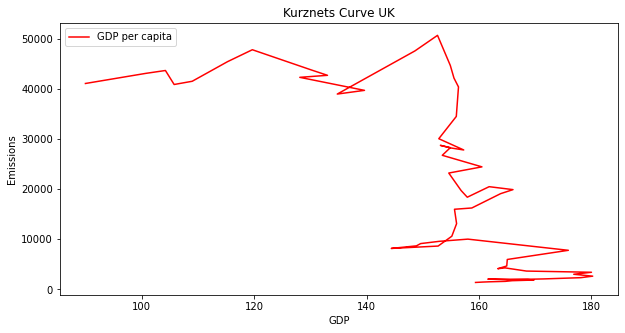

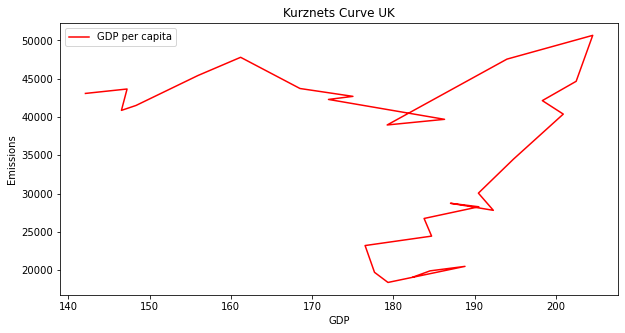

In [21]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['United Kingdom'], territorial_emissions_final['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['United Kingdom'], consumption_emissions_final['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

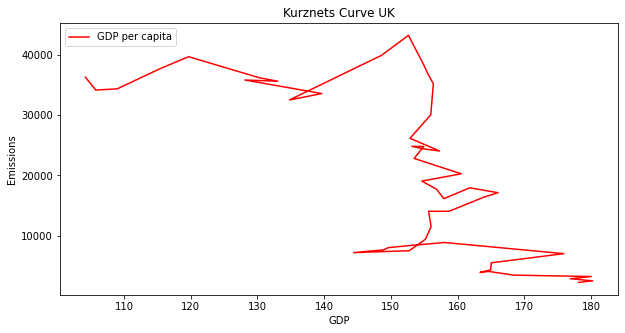

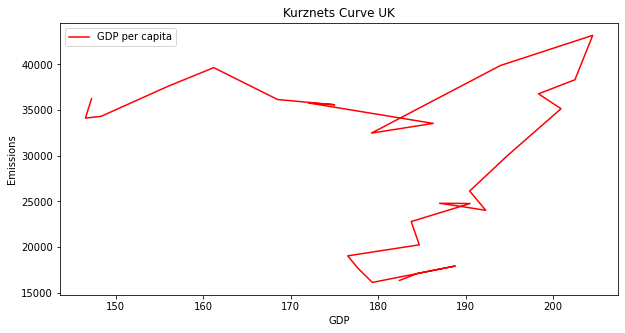

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['United Kingdom'], territorial_emissions_final['United Kingdom Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['United Kingdom'], consumption_emissions_final['United Kingdom Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

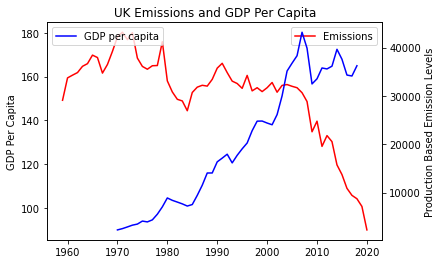

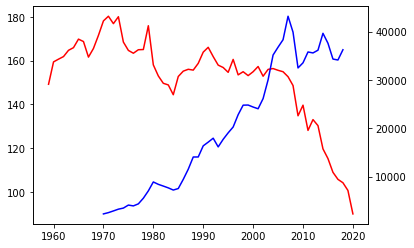

In [23]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
ax_right.set_ylabel("Production Based Emission Levels")
ax_left.set_ylabel("GDP Per Capita")
# make legend for both lines on the bottom left
ax_left.legend(loc='upper right')
ax_right.legend(loc='upper left')

plt.xlabel("Year")
plt.title("UK Emissions and GDP Per Capita")
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
plt.show()

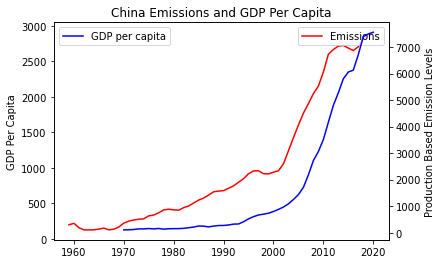

In [24]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['China'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['China Income'], color='blue', label='GDP per capita')
ax_right.set_ylabel("Production Based Emission Levels")
ax_left.set_ylabel("GDP Per Capita")
ax_left.legend(loc='upper right')
ax_right.legend(loc='upper left')
plt.xlabel("Year")
plt.title("China Emissions and GDP Per Capita")
plt.show()


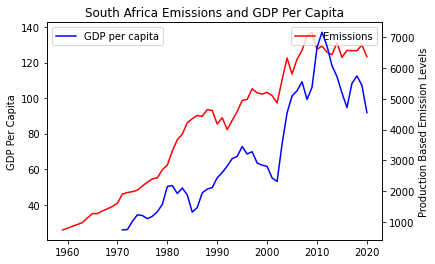

In [25]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
ax_right.set_ylabel("Production Based Emission Levels")
ax_left.set_ylabel("GDP Per Capita")
ax_left.legend(loc='upper right')
ax_right.legend(loc='upper left')
plt.xlabel("Year")
plt.title("South Africa Emissions and GDP Per Capita")
plt.show()

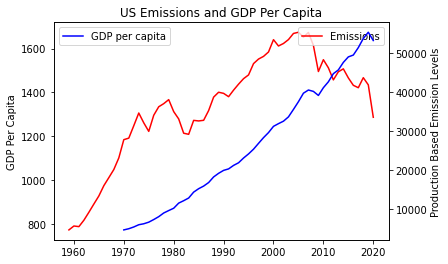

In [26]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United States Income'], color='blue', label='GDP per capita')
ax_right.set_ylabel("Production Based Emission Levels")
ax_left.set_ylabel("GDP Per Capita")
ax_left.legend(loc='upper right')
ax_right.legend(loc='upper left')
plt.xlabel("Year")
plt.title("US Emissions and GDP Per Capita")
plt.show()

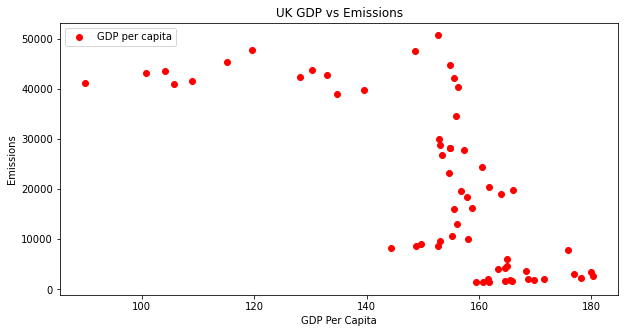

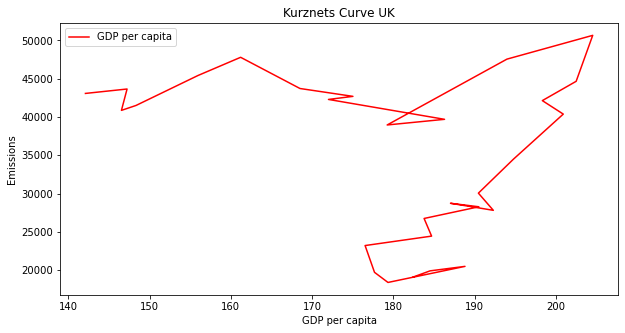

In [27]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.scatter(territorial_emissions_final['United Kingdom'], territorial_emissions_final['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('UK GDP vs Emissions')
plt.xlabel('GDP Per Capita')
plt.ylabel('Emissions')
plt.show()

# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['United Kingdom'], consumption_emissions_final['United Kingdom GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve UK')
plt.xlabel('GDP per capita')
plt.ylabel('Emissions')
plt.show()

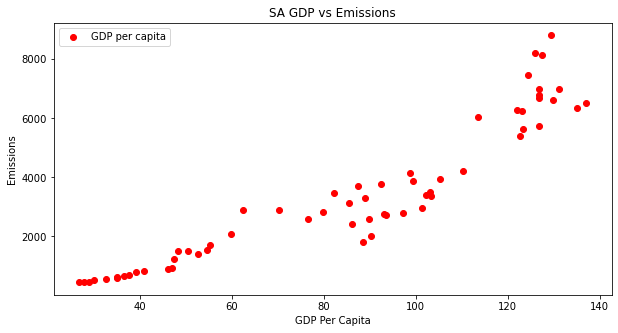

In [28]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.scatter(territorial_emissions_final['South Africa'], territorial_emissions_final['South Africa GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('SA GDP vs Emissions')
plt.xlabel('GDP Per Capita')
plt.ylabel('Emissions')
plt.show()

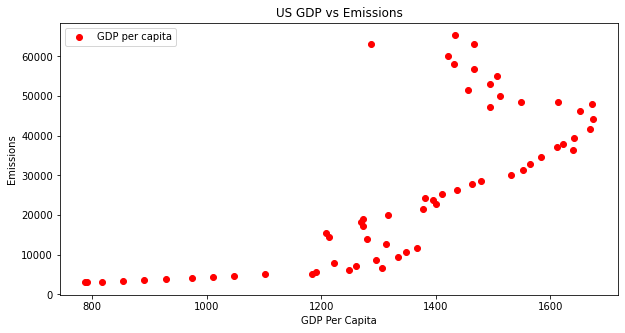

In [29]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.scatter(territorial_emissions_final['USA'], territorial_emissions_final['United States GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('US GDP vs Emissions')
plt.xlabel('GDP Per Capita')
plt.ylabel('Emissions')
plt.show()

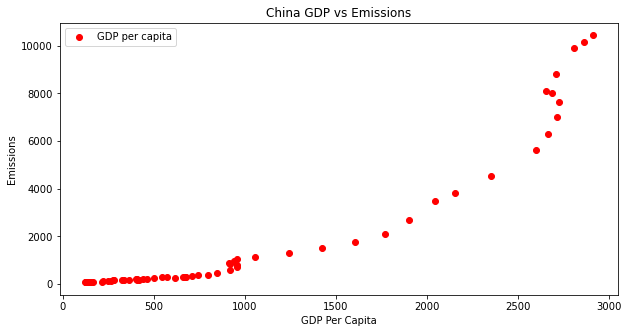

In [30]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.scatter(territorial_emissions_final['China'], territorial_emissions_final['China GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('China GDP vs Emissions')
plt.xlabel('GDP Per Capita')
plt.ylabel('Emissions')
plt.show()

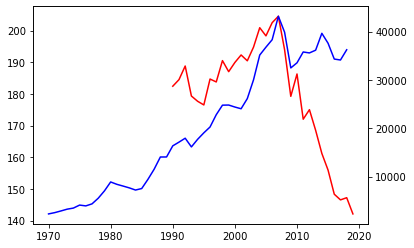

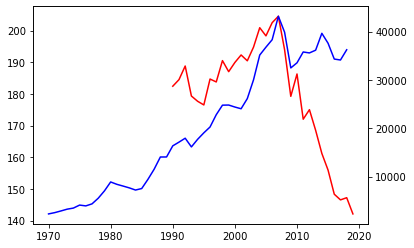

In [31]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United Kingdom Income'], color='blue', label='GDP per capita')
plt.show()

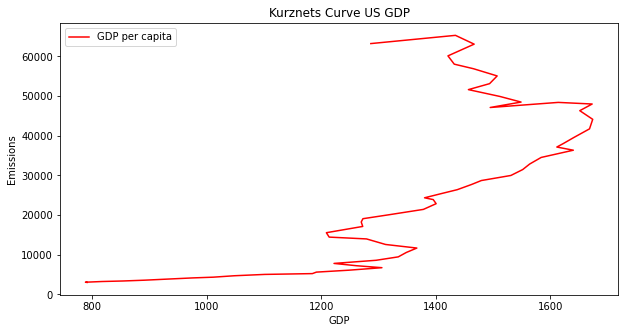

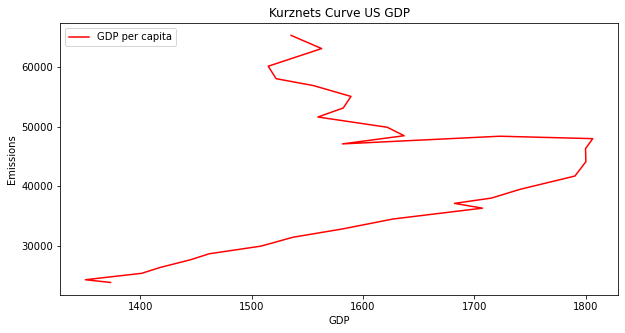

In [32]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['USA'], territorial_emissions_final['United States GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US GDP')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['USA'], consumption_emissions_final['United States GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US GDP')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

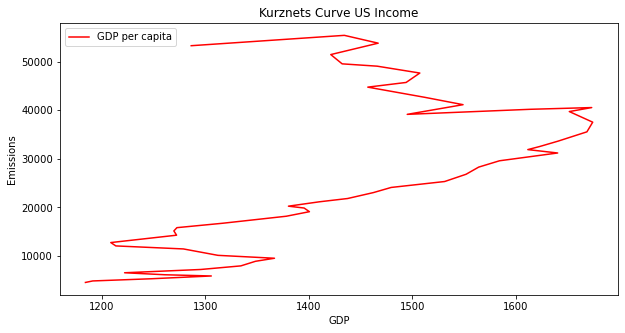

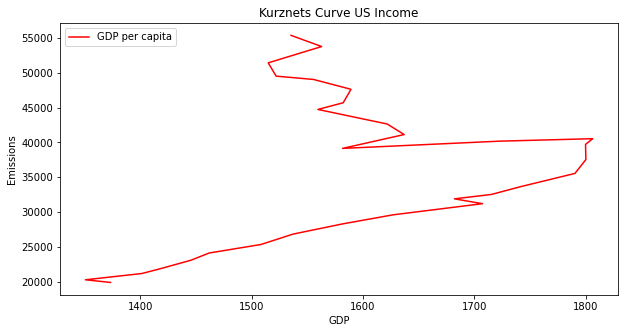

In [33]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['USA'], territorial_emissions_final['United States Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US Income')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['USA'], consumption_emissions_final['United States Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve US Income')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

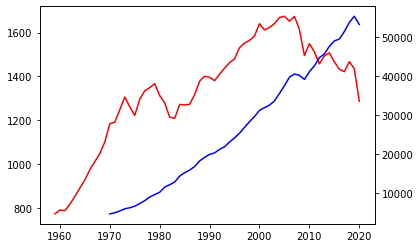

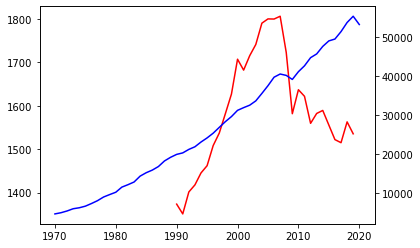

In [34]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()


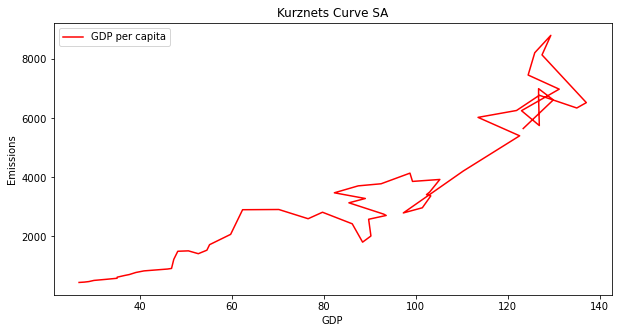

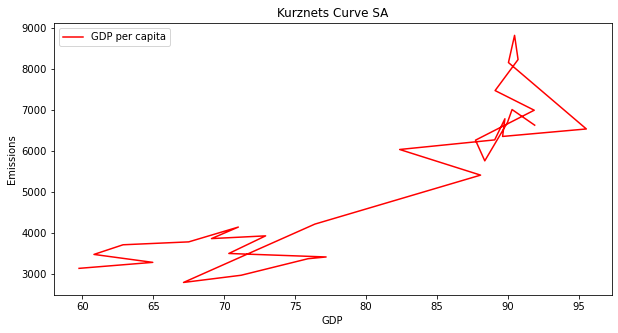

In [35]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['South Africa'], territorial_emissions_final['South Africa GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['South Africa'], consumption_emissions_final['South Africa GDP'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('GDP')
plt.ylabel('Emissions')
plt.show()

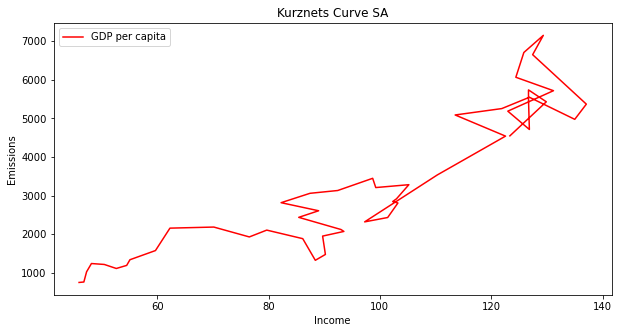

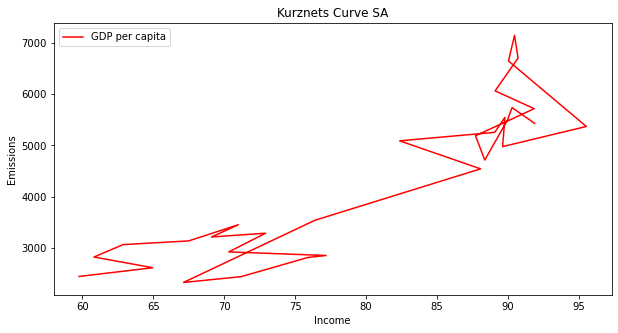

In [36]:
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(territorial_emissions_final['South Africa'], territorial_emissions_final['South Africa Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('Income')
plt.ylabel('Emissions')
plt.show()
# Plot GDP per capita by year for the UK
plt.figure(figsize=(10, 5))
plt.plot(consumption_emissions_final['South Africa'], consumption_emissions_final['South Africa Income'], color='red', label='GDP per capita')
plt.legend(loc='upper left')
plt.title('Kurznets Curve SA')
plt.xlabel('Income')
plt.ylabel('Emissions')
plt.show()

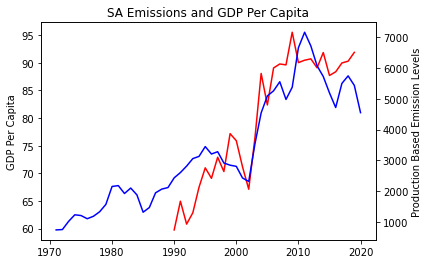

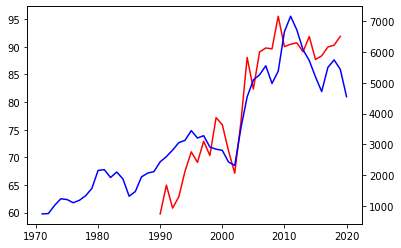

In [37]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
ax_right.set_ylabel("Production Based Emission Levels")
ax_left.set_ylabel("GDP Per Capita")
plt.xlabel("Year")
plt.title("SA Emissions and GDP Per Capita")
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
plt.show()

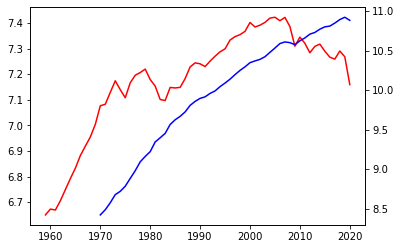

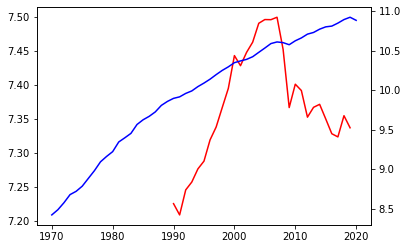

In [38]:
# Natural log of emissions, gdp and income
cols = territorial_emissions_final.columns
territorial_emissions_final[cols] = territorial_emissions_final[cols].apply(np.log, errors='coerce')

# consumption_emissions_final
cols = consumption_emissions_final.columns
consumption_emissions_final[cols] = consumption_emissions_final[cols].apply(np.log, errors='coerce')

# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()


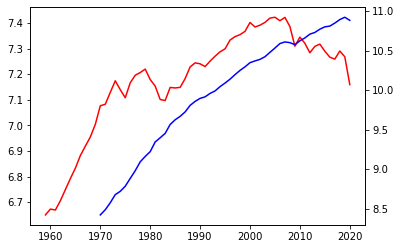

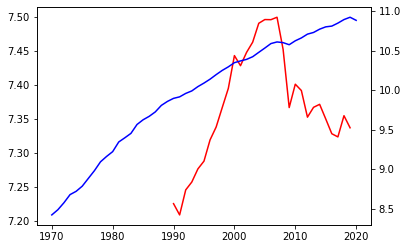

In [39]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(territorial_emissions_final.index.values, territorial_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(territorial_emissions_final.index.values, territorial_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['USA'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['United States Income'], color='blue', label='GDP per capita')
plt.show()

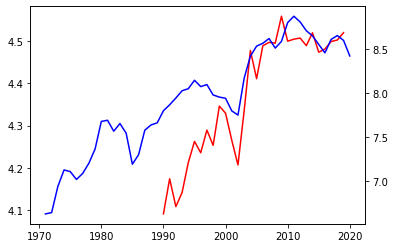

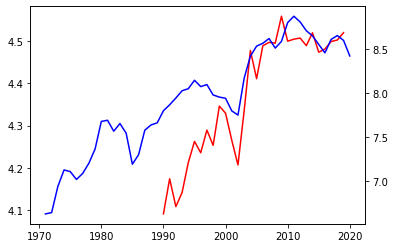

In [40]:
# Plot both United Kingdom Income and United Kingdom on the y axis with the index values of the dataframe on the x axis
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
plt.show()

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa'], color='red', label='Emissions')
ax_right.plot(consumption_emissions_final.index.values, consumption_emissions_final['South Africa Income'], color='blue', label='GDP per capita')
plt.show()

In [41]:
territorial_uk_emissions = territorial_emissions_final.loc[:, territorial_emissions_final.columns.intersection(['United Kingdom','United Kingdom GDP','United Kingdom Income','United Kingdom Energy Usage','United Kingdom Trade','United Kingdom Urbanization'])]
print(territorial_uk_emissions.head())
territorial_uk_emissions = territorial_uk_emissions.dropna()
territorial_uk_emissions['United Kingdom GDP Squared'] = territorial_uk_emissions['United Kingdom GDP']**2
print(territorial_uk_emissions.head())
X = territorial_uk_emissions['United Kingdom GDP']
y = territorial_uk_emissions['United Kingdom']
model = sm.OLS(y, X).fit()
print(model.summary())

consumption_emissions_uk = consumption_emissions_final.loc[:, consumption_emissions_final.columns.intersection(['United Kingdom','United Kingdom GDP','United Kingdom Income','United Kingdom Energy Usage','United Kingdom Trade','United Kingdom Urbanization'])]
print(consumption_emissions_uk.head())
consumption_emissions_uk = consumption_emissions_uk.dropna()
consumption_emissions_uk['United Kingdom GDP Squared'] = consumption_emissions_uk['United Kingdom GDP']**2
print(consumption_emissions_uk.head())
X = consumption_emissions_uk['United Kingdom GDP']
y = consumption_emissions_uk['United Kingdom']
model = sm.OLS(y, X).fit()
print(model.summary())

      United Kingdom  United Kingdom GDP  United Kingdom Income  \
Year                                                              
1959        5.005173                 NaN                    NaN   
1960        5.071380            7.242508                    NaN   
1961        5.079217            7.294639                    NaN   
1962        5.086523            7.330258                    NaN   
1963        5.104001            7.386134                    NaN   

      United Kingdom Energy Usage  United Kingdom Trade  \
Year                                                      
1959                          NaN                   NaN   
1960                     7.788269                   NaN   
1961                     7.845296                   NaN   
1962                     7.930443                   NaN   
1963                     8.007063                   NaN   

      United Kingdom Urbanization  
Year                               
1959                          NaN  
1960    

In [42]:
territorial_usa_emissions = territorial_emissions_final.loc[:, territorial_emissions_final.columns.intersection(['USA','United States GDP','United States Income','United States Energy Usage','United States Trade','United States Urbanization'])]
print(territorial_usa_emissions.head())
territorial_usa_emissions = territorial_usa_emissions.dropna()
territorial_usa_emissions['United States GDP Squared'] = territorial_usa_emissions['United States GDP']**2
print(territorial_usa_emissions.head())
X = territorial_usa_emissions['United States GDP']
y = territorial_usa_emissions['USA']
model = sm.OLS(y, X).fit()
print(model.summary())

consumption_emissions_usa = consumption_emissions_final.loc[:, consumption_emissions_final.columns.intersection(['USA','United States GDP','United States Income','United States Energy Usage','United States Trade','United States Urbanization'])]
print(consumption_emissions_usa.head())
consumption_emissions_usa = consumption_emissions_usa.dropna()
consumption_emissions_usa['United States GDP Squared'] = consumption_emissions_usa['United States GDP']**2
print(consumption_emissions_usa.head())
X = consumption_emissions_usa['United States GDP']
y = consumption_emissions_usa['USA']
model = sm.OLS(y, X).fit()
print(model.summary())

           USA  United States GDP  United States Income  \
Year                                                      
1959  6.650156                NaN                   NaN   
1960  6.672984           8.008739                   NaN   
1961  6.669374           8.028313                   NaN   
1962  6.705777           8.084514                   NaN   
1963  6.749110           8.124007                   NaN   

      United States Energy Usage  United States Trade  \
Year                                                    
1959                         NaN                  NaN   
1960                    8.306419                  NaN   
1961                    8.338587                  NaN   
1962                    8.396969                  NaN   
1963                    8.453292                  NaN   

      United States Urbanization  
Year                              
1959                         NaN  
1960                         NaN  
1961                    0.788717  
1962       

In [43]:
territorial_sa_emissions = territorial_emissions_final.loc[:, territorial_emissions_final.columns.intersection(['South Africa','South Africa GDP','South Africa Income','South Africa Energy Usage','South Africa Trade','South Africa Urbanization'])]
print(territorial_sa_emissions.head())
territorial_sa_emissions = territorial_sa_emissions.dropna()
territorial_sa_emissions['South Africa GDP Squared'] = territorial_sa_emissions['South Africa GDP']**2
print(territorial_sa_emissions.head())
X = territorial_sa_emissions['South Africa GDP']
y = territorial_sa_emissions['South Africa']
model = sm.OLS(y, X).fit()
print(model.summary())

consumption_emissions_sa = consumption_emissions_final.loc[:, consumption_emissions_final.columns.intersection(['South Africa','South Africa GDP','South Africa Income','South Africa Energy Usage','South Africa Trade','South Africa Urbanization'])]
print(consumption_emissions_sa.head())
consumption_emissions_sa = consumption_emissions_sa.dropna()
consumption_emissions_sa['South Africa GDP Squared'] = consumption_emissions_sa['South Africa GDP']**2
print(consumption_emissions_sa.head())
X = consumption_emissions_sa['South Africa GDP']
y = consumption_emissions_sa['South Africa']
model = sm.OLS(y, X).fit()
print(model.summary())

      South Africa  South Africa GDP  South Africa Income  \
Year                                                        
1959      3.249757               NaN                  NaN   
1960      3.284814          6.093592                  NaN   
1961      3.327592          6.120214                  NaN   
1962      3.361766          6.159119                  NaN   
1963      3.399423          6.237342                  NaN   

      South Africa Energy Usage  South Africa Trade  South Africa Urbanization  
Year                                                                            
1959                        NaN                 NaN                        NaN  
1960                        NaN            3.991056                        NaN  
1961                        NaN            3.924413                   1.038803  
1962                        NaN            3.913340                   1.003437  
1963                        NaN            3.947488                   1.014127  
     

In [44]:
territorial_china_emissions = territorial_emissions_final.loc[:, territorial_emissions_final.columns.intersection(['China','China GDP','China Income','China Energy Usage','China Trade','China Urbanization'])]
print(territorial_china_emissions.head())
territorial_china_emissions = territorial_china_emissions.dropna()
territorial_china_emissions['China GDP Squared'] = territorial_china_emissions['China GDP']**2
print(territorial_china_emissions.head())
X = territorial_china_emissions['China GDP']
y = territorial_china_emissions['China']
model = sm.OLS(y, X).fit()
print(model.summary())

consumption_emissions_china = consumption_emissions_final.loc[:, consumption_emissions_final.columns.intersection(['China','China GDP','China Income','China Energy Usage','China Trade','China Urbanization'])]
print(consumption_emissions_china.head())
consumption_emissions_china = consumption_emissions_china.dropna()
consumption_emissions_china['China GDP Squared'] = consumption_emissions_china['China GDP']**2
print(consumption_emissions_china.head())
X = consumption_emissions_china['China GDP']
y = consumption_emissions_china['China']
model = sm.OLS(y, X).fit()
print(model.summary())

         China  China GDP  China Income  China Energy Usage  China Trade  \
Year                                                                       
1959  5.280906        NaN           NaN                 NaN          NaN   
1960  5.384555   4.494468           NaN                 NaN     2.167235   
1961  5.048186   4.328175           NaN                 NaN     1.996090   
1962  4.831840   4.261403           NaN                 NaN     1.940314   
1963  4.825645   4.308295           NaN                 NaN     1.926485   

      China Urbanization  
Year                      
1959                 NaN  
1960                 NaN  
1961            0.719592  
1962            1.354204  
1963            1.703591  
         China  China GDP  China Income  China Energy Usage  China Trade  \
Year                                                                       
1971  5.514020   4.776217      4.687589            5.023810     1.593478   
1972  5.577343   4.881919      4.786130           

In [45]:
# calculate Pearson's correlation
corr, _ = pearsonr(territorial_uk_emissions['United Kingdom'], territorial_uk_emissions['United Kingdom GDP'])
print('Pearsons correlation: %.3f' % corr)
print('P value: %.3f' % _)
# Should be -0.614 I think, changed when added in all the data (probably because of dropped nan values)

Pearsons correlation: -0.712
P value: 0.000


In [46]:
# calculate Pearson's correlation for consumption
corr, _ = pearsonr(consumption_emissions_uk['United Kingdom'], consumption_emissions_uk['United Kingdom GDP'])
print('Pearsons correlation: %.3f' % corr)
print('P value: %.3f' % _)


Pearsons correlation: 0.109
P value: 0.604


In [47]:
C = np.corrcoef(territorial_uk_emissions['United Kingdom'], territorial_uk_emissions['United Kingdom GDP'])
print(C)


[[ 1.         -0.71216697]
 [-0.71216697  1.        ]]


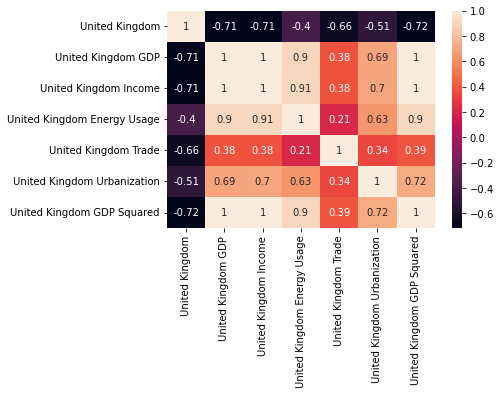

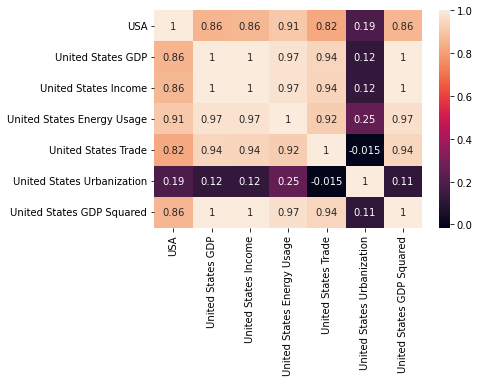

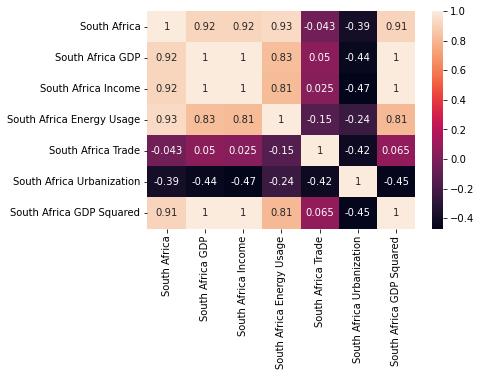

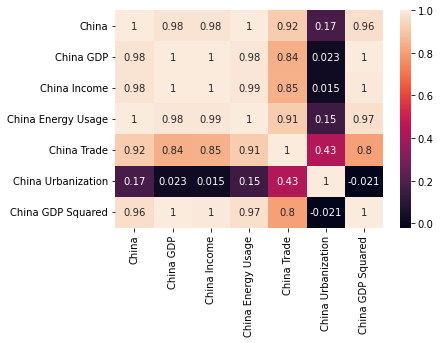

In [48]:
correlation_mat = territorial_uk_emissions.corr(method='pearson', min_periods=1)

sns.heatmap(correlation_mat, annot = True)

plt.show()

correlation_mat = territorial_usa_emissions.corr(method='pearson', min_periods=1)

sns.heatmap(correlation_mat, annot = True)

plt.show()

correlation_mat = territorial_sa_emissions.corr(method='pearson', min_periods=1)

sns.heatmap(correlation_mat, annot = True)

plt.show()

correlation_mat = territorial_china_emissions.corr(method='pearson', min_periods=1)

sns.heatmap(correlation_mat, annot = True)

plt.show()


In [49]:
rho = territorial_uk_emissions.corr()
pval = territorial_uk_emissions.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,United Kingdom,United Kingdom GDP,United Kingdom Income,United Kingdom Energy Usage,United Kingdom Trade,United Kingdom Urbanization,United Kingdom GDP Squared
United Kingdom,1.0***,-0.71***,-0.71***,-0.4***,-0.66***,-0.51***,-0.72***
United Kingdom GDP,-0.71***,1.0***,1.0***,0.9***,0.38**,0.69***,1.0***
United Kingdom Income,-0.71***,1.0***,1.0***,0.91***,0.38**,0.7***,1.0***
United Kingdom Energy Usage,-0.4***,0.9***,0.91***,1.0***,0.21,0.63***,0.9***
United Kingdom Trade,-0.66***,0.38**,0.38**,0.21,1.0***,0.34**,0.39**
United Kingdom Urbanization,-0.51***,0.69***,0.7***,0.63***,0.34**,1.0***,0.72***
United Kingdom GDP Squared,-0.72***,1.0***,1.0***,0.9***,0.39**,0.72***,1.0***


In [50]:
rho = territorial_usa_emissions.corr()
pval = territorial_usa_emissions.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,USA,United States GDP,United States Income,United States Energy Usage,United States Trade,United States Urbanization,United States GDP Squared
USA,1.0***,0.86***,0.86***,0.91***,0.82***,0.19,0.86***
United States GDP,0.86***,1.0***,1.0***,0.97***,0.94***,0.12,1.0***
United States Income,0.86***,1.0***,1.0***,0.97***,0.94***,0.12,1.0***
United States Energy Usage,0.91***,0.97***,0.97***,1.0***,0.92***,0.25,0.97***
United States Trade,0.82***,0.94***,0.94***,0.92***,1.0***,-0.02,0.94***
United States Urbanization,0.19,0.12,0.12,0.25,-0.02,1.0***,0.11
United States GDP Squared,0.86***,1.0***,1.0***,0.97***,0.94***,0.11,1.0***


In [51]:
rho = territorial_sa_emissions.corr()
pval = territorial_sa_emissions.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,South Africa,South Africa GDP,South Africa Income,South Africa Energy Usage,South Africa Trade,South Africa Urbanization,South Africa GDP Squared
South Africa,1.0***,0.92***,0.92***,0.93***,-0.04,-0.39***,0.91***
South Africa GDP,0.92***,1.0***,1.0***,0.83***,0.05,-0.44***,1.0***
South Africa Income,0.92***,1.0***,1.0***,0.81***,0.03,-0.47***,1.0***
South Africa Energy Usage,0.93***,0.83***,0.81***,1.0***,-0.15,-0.24,0.81***
South Africa Trade,-0.04,0.05,0.03,-0.15,1.0***,-0.42***,0.06
South Africa Urbanization,-0.39***,-0.44***,-0.47***,-0.24,-0.42***,1.0***,-0.45***
South Africa GDP Squared,0.91***,1.0***,1.0***,0.81***,0.06,-0.45***,1.0***


In [52]:
rho = territorial_china_emissions.corr()
pval = territorial_china_emissions.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,China,China GDP,China Income,China Energy Usage,China Trade,China Urbanization,China GDP Squared
China,1.0***,0.98***,0.98***,1.0***,0.92***,0.17,0.96***
China GDP,0.98***,1.0***,1.0***,0.98***,0.84***,0.02,1.0***
China Income,0.98***,1.0***,1.0***,0.99***,0.85***,0.02,1.0***
China Energy Usage,1.0***,0.98***,0.99***,1.0***,0.91***,0.15,0.97***
China Trade,0.92***,0.84***,0.85***,0.91***,1.0***,0.43***,0.8***
China Urbanization,0.17,0.02,0.02,0.15,0.43***,1.0***,-0.02
China GDP Squared,0.96***,1.0***,1.0***,0.97***,0.8***,-0.02,1.0***


In [53]:
# ADF Unit Root Test 
# Still need to determine ideal lag
result = adfuller(territorial_uk_emissions['United Kingdom'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')    

result = adfuller(consumption_emissions_uk['United Kingdom'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.27625180486502343
n_lags: 0.9288010929194027
p-value: 0.9288010929194027
ADF Statistic: -0.5285655751388648
n_lags: 0.8863205461905714
p-value: 0.8863205461905714


In [54]:
# Need to do it with multiple variables: df.corr(method='pearson', min_periods=1)
# Compute pairwise correlation of columns, excluding NA/null values



In [55]:
# Co-integration Tests
result = ts.coint(territorial_uk_emissions['United Kingdom'], territorial_uk_emissions['United Kingdom GDP'])
print(result)

(-1.2201656009293036, 0.8525411376219372, array([-4.17620576, -3.48547649, -3.1469729 ]))


# Final Analysis - Regression Results
## United Kingdom

In [56]:
# Regression 
# Territorial UK
y = territorial_uk_emissions['United Kingdom']
x = territorial_uk_emissions.drop(['United Kingdom'], axis=1).drop(['United Kingdom Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())
model.summary()

with open('uk_territorial_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:         United Kingdom   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     60.97
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           7.67e-17
Time:                        16:42:30   Log-Likelihood:                 91.743
No. Observations:                  43   AIC:                            -171.5
Df Residuals:                      37   BIC:                            -160.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

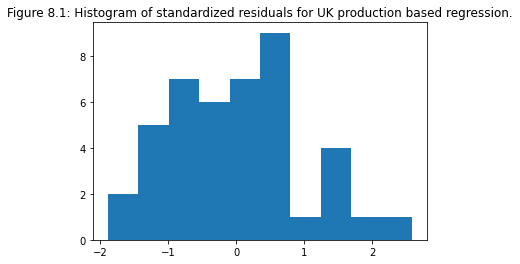

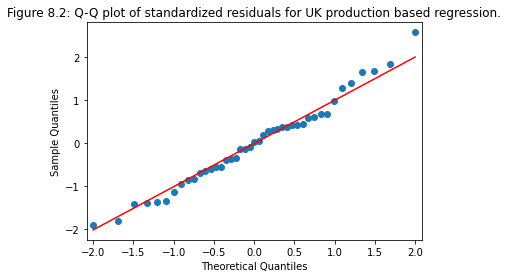

Statistics=0.768, p=0.681
Sample looks Gaussian (fail to reject H0)


In [57]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.1: Histogram of standardized residuals for UK production based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.2: Q-Q plot of standardized residuals for UK production based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


In [58]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 24.951593661060265, 'Test Statistic p-value': 0.1621417569498626, 'F-Statistic': 1.6735306253844933, 'F-Test p-value': 0.11945767818686262}


In [59]:
# Consumption UK
y = consumption_emissions_uk['United Kingdom']
x = consumption_emissions_uk.drop(['United Kingdom'], axis=1).drop(['United Kingdom Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

with open('uk_consumption_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())


                            OLS Regression Results                            
Dep. Variable:         United Kingdom   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     34.51
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           6.74e-09
Time:                        16:42:30   Log-Likelihood:                 65.041
No. Observations:                  25   AIC:                            -118.1
Df Residuals:                      19   BIC:                            -110.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

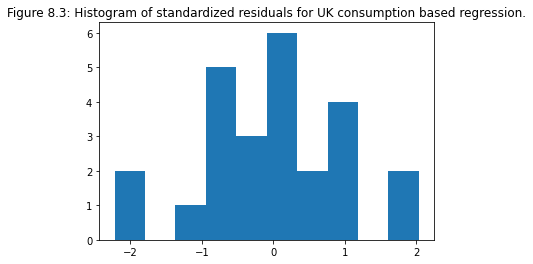

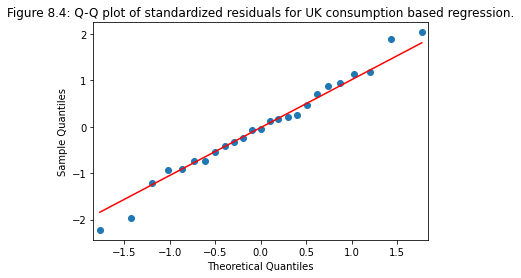

Statistics=0.079, p=0.961
Sample looks Gaussian (fail to reject H0)


In [60]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.3: Histogram of standardized residuals for UK consumption based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.4: Q-Q plot of standardized residuals for UK consumption based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [61]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 16.12299051712397, 'Test Statistic p-value': 0.6490567780465387, 'F-Statistic': 0.47796414429127937, 'F-Test p-value': 0.8888921837292898}


In [62]:
print(territorial_uk_emissions.describe())
print(consumption_emissions_uk.describe())

       United Kingdom  United Kingdom GDP  United Kingdom Income  \
count       43.000000           43.000000              43.000000   
mean         5.046325            9.683411               9.553485   
std          0.088125            0.931670               0.892850   
min          4.784898            7.761125               7.721542   
25%          5.029935            9.037460               8.902959   
50%          5.049660            9.898512               9.781514   
75%          5.097431           10.509221              10.348933   
max          5.194272           10.832759              10.673214   

       United Kingdom Energy Usage  United Kingdom Trade  \
count                    43.000000             43.000000   
mean                      8.573506              3.946351   
std                       0.119490              0.096283   
min                       8.334935              3.721863   
25%                       8.456771              3.895886   
50%                       8

In [63]:
# ADF Unit Root Test - Level (do for E T and UG)
result = adfuller(territorial_uk_emissions['United Kingdom Energy Usage'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')  

result = adfuller(consumption_emissions_uk['United Kingdom Energy Usage'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.3367766103717638
n_lags: 0.16038089903931446
p-value: 0.16038089903931446
ADF Statistic: -1.9604065097690173
n_lags: 0.3041986015019339
p-value: 0.3041986015019339


In [64]:
# ADF Unit Root Test - 1st Diff (do for E T and UG) 
territorial_uk_emissions_first_diff = territorial_uk_emissions.diff().dropna()
result = adfuller(territorial_uk_emissions_first_diff['United Kingdom Energy Usage'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

consumption_emissions_uk_first_diff = consumption_emissions_uk.diff().dropna()
result = adfuller(consumption_emissions_uk_first_diff['United Kingdom Energy Usage'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.900855351978127
n_lags: 3.474090990282875e-05
p-value: 3.474090990282875e-05
ADF Statistic: -0.2581242954943002
n_lags: 0.931229352647096
p-value: 0.931229352647096


In [65]:
# ADF Unit Root Test - Level (do for E T and UG)
result = adfuller(territorial_uk_emissions['United Kingdom Trade'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')  

result = adfuller(consumption_emissions_uk['United Kingdom Trade'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

# ADF Unit Root Test - 1st Diff (do for E T and UG) 
territorial_uk_emissions_first_diff = territorial_uk_emissions.diff().dropna()
result = adfuller(territorial_uk_emissions_first_diff['United Kingdom Trade'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

consumption_emissions_uk_first_diff = consumption_emissions_uk.diff().dropna()
result = adfuller(consumption_emissions_uk_first_diff['United Kingdom Trade'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.5953187972841256
n_lags: 0.09396864181095144
p-value: 0.09396864181095144
ADF Statistic: 1.623809716808862
n_lags: 0.9979272780144308
p-value: 0.9979272780144308
ADF Statistic: -5.351419148014969
n_lags: 4.280944529267055e-06
p-value: 4.280944529267055e-06
ADF Statistic: -1.8643717223013707
n_lags: 0.3490028362198989
p-value: 0.3490028362198989


## Unites States

In [66]:
# Regression 
# Territorial USA
y = territorial_usa_emissions['USA']
x = territorial_usa_emissions.drop(['USA'], axis=1).drop(['United States Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

with open('us_territorial_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:                    USA   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     188.1
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           3.36e-26
Time:                        16:42:30   Log-Likelihood:                 109.66
No. Observations:                  45   AIC:                            -207.3
Df Residuals:                      39   BIC:                            -196.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

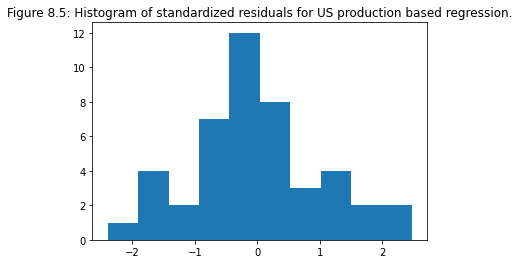

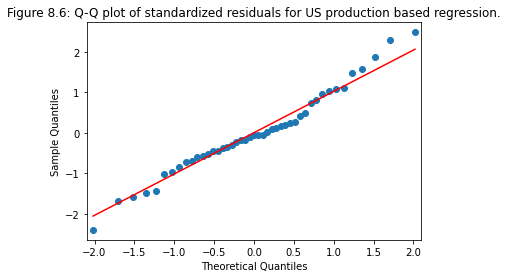

Statistics=1.218, p=0.544
Sample looks Gaussian (fail to reject H0)


In [67]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.5: Histogram of standardized residuals for US production based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.6: Q-Q plot of standardized residuals for US production based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [68]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 19.455208745125596, 'Test Statistic p-value': 0.4280036606659123, 'F-Statistic': 1.002120495710863, 'F-Test p-value': 0.49020406142497525}


In [69]:
# Consumption USA
y = consumption_emissions_usa['USA']
x = consumption_emissions_usa.drop(['USA'], axis=1).drop(['United States Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

with open('us_consumption_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:                    USA   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     67.65
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.93e-11
Time:                        16:42:31   Log-Likelihood:                 62.254
No. Observations:                  25   AIC:                            -112.5
Df Residuals:                      19   BIC:                            -105.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

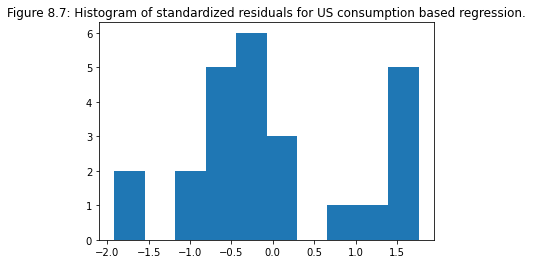

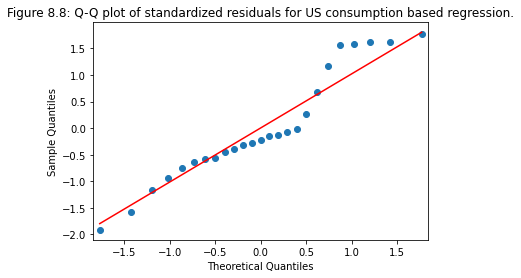

Statistics=1.092, p=0.579
Sample looks Gaussian (fail to reject H0)


In [70]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.7: Histogram of standardized residuals for US consumption based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.8: Q-Q plot of standardized residuals for US consumption based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [71]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 22.072792988979927, 'Test Statistic p-value': 0.28064845099043734, 'F-Statistic': 1.984359053553202, 'F-Test p-value': 0.23038826482721533}


## South Africa

In [72]:
# Regression 
# Territorial SA
y = territorial_sa_emissions['South Africa']
x = territorial_sa_emissions.drop(['South Africa'], axis=1).drop(['South Africa Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

with open('sa_territorial_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:           South Africa   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     228.8
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           2.84e-27
Time:                        16:42:31   Log-Likelihood:                 62.605
No. Observations:                  44   AIC:                            -113.2
Df Residuals:                      38   BIC:                            -102.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

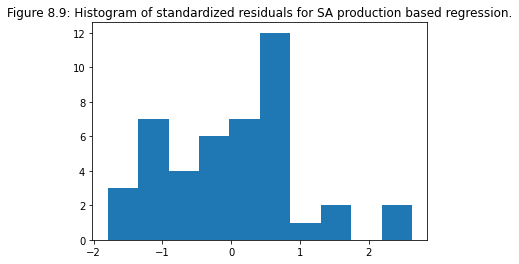

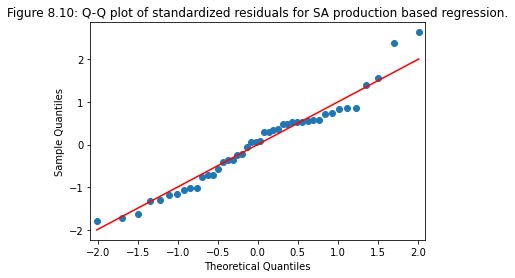

Statistics=1.278, p=0.528
Sample looks Gaussian (fail to reject H0)


In [73]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.9: Histogram of standardized residuals for SA production based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.10: Q-Q plot of standardized residuals for SA production based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [74]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 26.723810576114616, 'Test Statistic p-value': 0.11125260971839593, 'F-Statistic': 1.9539258038002763, 'F-Test p-value': 0.06091275659088311}


In [75]:
# Consumption SA
y = consumption_emissions_sa['South Africa']
x = consumption_emissions_sa.drop(['South Africa'], axis=1).drop(['South Africa Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

with open('sa_consumption_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:           South Africa   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     69.54
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.51e-11
Time:                        16:42:31   Log-Likelihood:                 49.732
No. Observations:                  25   AIC:                            -87.46
Df Residuals:                      19   BIC:                            -80.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

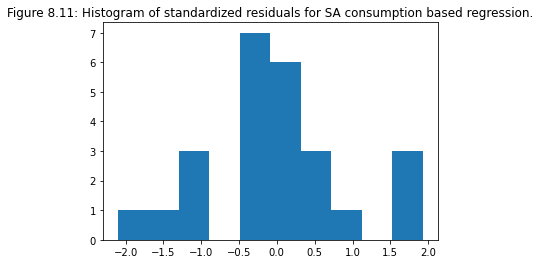

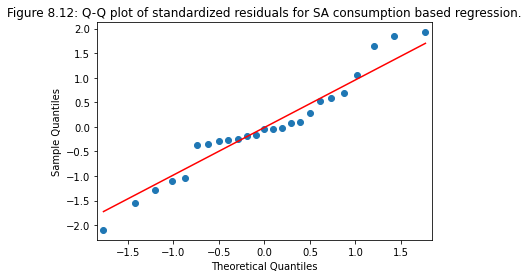

Statistics=0.364, p=0.833
Sample looks Gaussian (fail to reject H0)


In [76]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.11: Histogram of standardized residuals for SA consumption based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.12: Q-Q plot of standardized residuals for SA consumption based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [77]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 14.728582932446944, 'Test Statistic p-value': 0.7396849133462944, 'F-Statistic': 0.377352302167113, 'F-Test p-value': 0.9442683866858108}


## China

In [78]:
# Regression 
# Territorial China
y = territorial_china_emissions['China']
x = territorial_china_emissions.drop(['China'], axis=1).drop(['China Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

with open('china_territorial_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:                  China   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1592.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           4.90e-43
Time:                        16:42:31   Log-Likelihood:                 70.852
No. Observations:                  44   AIC:                            -129.7
Df Residuals:                      38   BIC:                            -119.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3590      0

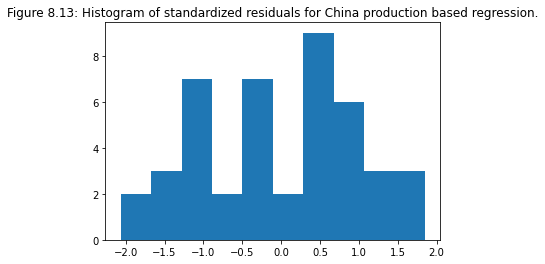

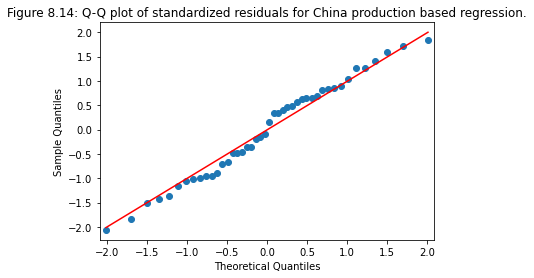

Statistics=3.362, p=0.186
Sample looks Gaussian (fail to reject H0)


In [79]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.13: Histogram of standardized residuals for China production based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.14: Q-Q plot of standardized residuals for China production based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [80]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 24.747866764965412, 'Test Statistic p-value': 0.1690099534893981, 'F-Statistic': 1.623740231818804, 'F-Test p-value': 0.13025727059120962}


In [81]:
# Consumption China
y = consumption_emissions_china['China']
x = consumption_emissions_china.drop(['China'], axis=1).drop(['China Income'], axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

with open('china_consumption_regression_results.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

                            OLS Regression Results                            
Dep. Variable:                  China   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     524.9
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.14e-19
Time:                        16:42:31   Log-Likelihood:                 46.979
No. Observations:                  25   AIC:                            -81.96
Df Residuals:                      19   BIC:                            -74.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0359      1

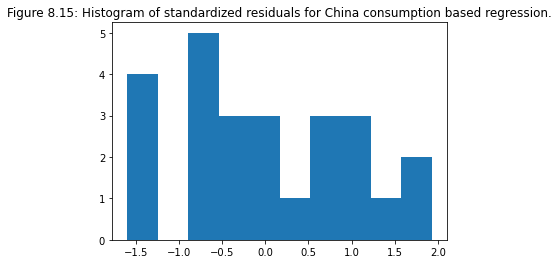

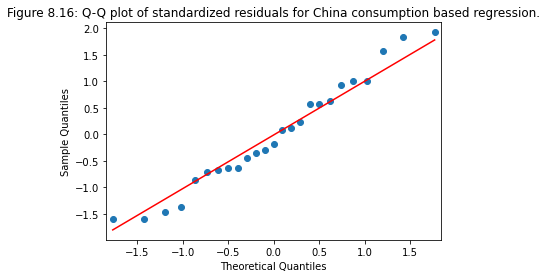

Statistics=1.094, p=0.579
Sample looks Gaussian (fail to reject H0)


In [82]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal


plt.hist(standardized_residuals)
plt.title('Figure 8.15: Histogram of standardized residuals for China consumption based regression.')
plt.show()
qqplot(standardized_residuals, line='s')
plt.title('Figure 8.16: Q-Q plot of standardized residuals for China consumption based regression.')
plt.show()
# normality test
stat, p = normaltest(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [83]:
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 20.028336931130685, 'Test Statistic p-value': 0.39287483814546287, 'F-Statistic': 1.0601311691613025, 'F-Test p-value': 0.5240941186123267}


In [84]:
# How to Perform White's Test in Python (Step-by-Step) - White General Heteroscedasticity Test.
# Step 1: Load Data. ...
# Step 2: Fit Regression Model. ...
# Step 3: Perform White's Test.


In [85]:
# before this do descriptive analysis

In [86]:
# Make the heatmap show statistical significance as the heatmap? or seperate calculate_pvalues(df) 
# def calculate_pvalues(df):
#     df = df.dropna()._get_numeric_data()
#     dfcols = pd.DataFrame(columns=df.columns)
#     pvalues = dfcols.transpose().join(dfcols, how='outer')
#     for r in df.columns:
#         for c in df.columns:
#             pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
#     return pvalues
# correlation_mat = calculate_pvalues(territorial_uk_emissions)

# sns.heatmap(correlation_mat, annot = True)

# plt.show()



In [87]:
# Show one example above and whether fits Kurznets model and then run for all

In [88]:
# Kurznets Curve Model


In [89]:
# Need to also do Per Capita Income


In [90]:
# Graph economic trade and the emissions trade to see if they correlate and are at the same time or whatever (Graph emission trade from emissions excel )
# Add emissions trade as variable in the territorial emission regression to test
# Or instead regress territorial emissions on trade seperately?
# Schedule time with analysis team for this


In [91]:
territorial_trade_emissions_final = territorial_emissions_final.join(trade_of_emissions)
territorial_trade_emissions_final.head()
consumption_trade_emissions_final = consumption_emissions_final.join(trade_of_emissions)
consumption_trade_emissions_final.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia Emissions Trade,Central America Emissions Trade,Europe Emissions Trade,Middle East Emissions Trade,North America Emissions Trade,Oceania Emissions Trade,South America Emissions Trade,Bunkers Emissions Trade,Statistical Difference Emissions Trade,World Emissions Trade
Year,,,,,,,,,,,,,,,,,,,,,
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [92]:
uk_territorial_trade_emissions_final = territorial_trade_emissions_final.loc[:, territorial_trade_emissions_final.columns.intersection(['United Kingdom','United Kingdom GDP','United Kingdom Emissions Trade','United Kingdom Energy United Kingdomge','United Kingdom Trade','United Kingdom Urbanization'])]
print(uk_territorial_trade_emissions_final.head())
uk_territorial_trade_emissions_final = uk_territorial_trade_emissions_final.dropna()
print(uk_territorial_trade_emissions_final.head())
X = uk_territorial_trade_emissions_final['United Kingdom GDP']
y = uk_territorial_trade_emissions_final['United Kingdom']
model = sm.OLS(y, X).fit()
print(model.summary())

      United Kingdom  United Kingdom GDP  United Kingdom Trade  \
Year                                                             
1959        5.005173                 NaN                   NaN   
1960        5.071380            7.242508                   NaN   
1961        5.079217            7.294639                   NaN   
1962        5.086523            7.330258                   NaN   
1963        5.104001            7.386134                   NaN   

      United Kingdom Urbanization  United Kingdom Emissions Trade  
Year                                                               
1959                          NaN                             NaN  
1960                          NaN                             NaN  
1961                    -0.398711                             NaN  
1962                    -0.394964                             NaN  
1963                    -0.558921                             NaN  
      United Kingdom  United Kingdom GDP  United Kingdom Trad

In [93]:
uk_consumption_trade_emissions_final = consumption_trade_emissions_final.loc[:, consumption_trade_emissions_final.columns.intersection(['United Kingdom','United Kingdom GDP','United Kingdom Emissions Trade','United Kingdom Energy United Kingdomge','United Kingdom Trade','United Kingdom Urbanization'])]
print(uk_consumption_trade_emissions_final.head())
uk_consumption_trade_emissions_final = uk_consumption_trade_emissions_final.dropna()
print(uk_consumption_trade_emissions_final.head())
X = uk_consumption_trade_emissions_final['United Kingdom GDP']
y = uk_consumption_trade_emissions_final['United Kingdom']
model = sm.OLS(y, X).fit()
print(model.summary())

      United Kingdom  United Kingdom GDP  United Kingdom Trade  \
Year                                                             
1959             NaN                 NaN                   NaN   
1960             NaN            7.242508                   NaN   
1961             NaN            7.294639                   NaN   
1962             NaN            7.330258                   NaN   
1963             NaN            7.386134                   NaN   

      United Kingdom Urbanization  United Kingdom Emissions Trade  
Year                                                               
1959                          NaN                             NaN  
1960                          NaN                             NaN  
1961                    -0.398711                             NaN  
1962                    -0.394964                             NaN  
1963                    -0.558921                             NaN  
      United Kingdom  United Kingdom GDP  United Kingdom Trad

In [94]:
# Regression 
# Territorial UK
y = uk_territorial_trade_emissions_final['United Kingdom']
x = uk_territorial_trade_emissions_final.drop(['United Kingdom'], axis=1)
model = sm.OLS(y, x).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:         United Kingdom   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9995.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):                    5.16e-41
Time:                        16:42:32   Log-Likelihood:                          19.498
No. Observations:                  30   AIC:                                     -31.00
Df Residuals:                      26   BIC:                                     -25.39
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [95]:
# Consumption UK
y = uk_consumption_trade_emissions_final['United Kingdom']
x = uk_consumption_trade_emissions_final.drop(['United Kingdom'], axis=1)
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         United Kingdom   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.630e+04
Date:                Sat, 13 Aug 2022   Prob (F-statistic):                    8.96e-44
Time:                        16:42:32   Log-Likelihood:                          25.466
No. Observations:                  30   AIC:                                     -42.93
Df Residuals:                      26   BIC:                                     -37.33
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [96]:
corr, _ = pearsonr(uk_territorial_trade_emissions_final["United Kingdom GDP"], uk_territorial_trade_emissions_final["United Kingdom Emissions Trade"])
print('Pearsons correlation: %.3f' % corr)
print(_)

Pearsons correlation: -0.940
1.475651099104044e-14
